In [23]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import pandas as pd
from numpy import unique
from numpy import where
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from matplotlib import pyplot
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import warnings

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')


def get_keys_from_value(d, val):
    return [k for k, v in d.items() if v == val]


In [24]:
## Reading the data
df_marketdata = pd.read_csv("https://raw.githubusercontent.com/NaveenKaliannan/Machine-learning/main/tutorials/Assignments/Assignments1/MarketData.csv")
newdataset=[ [i, j] for i, j in enumerate(df_marketdata['Volume']) ]
newdataset=np.array(newdataset)


In [25]:
## finding the optimum number of cluster using SILHOUETTE approach
opt_cluster={}
for i in range(2,5,1):
  model = KMeans(n_clusters=i)
  model.fit(newdataset)
  y_kmean = model.predict(newdataset)  
  opt_cluster[i] = opt_cluster.get(i, silhouette_score(newdataset, y_kmean))

opt_cluster = get_keys_from_value(opt_cluster, max(opt_cluster.values()) )
opt_cluster = opt_cluster[0]
print("optimum cluster = {}".format(opt_cluster))

optimum cluster = 3


In [26]:
x1 = np.array(df_marketdata.index)
x2 = np.array(df_marketdata['Volume'])
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']
# k means determine k
distortions = []
K = range(1,8)
for k in K:
  kmeanModel = KMeans(n_clusters=k).fit(X)
  kmeanModel.fit(X)
  distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

In [27]:
## Performing the K-Means cluster with an optimum cluster
model = KMeans(n_clusters=opt_cluster)
model.fit(newdataset)
y_kmean = model.predict(newdataset)  

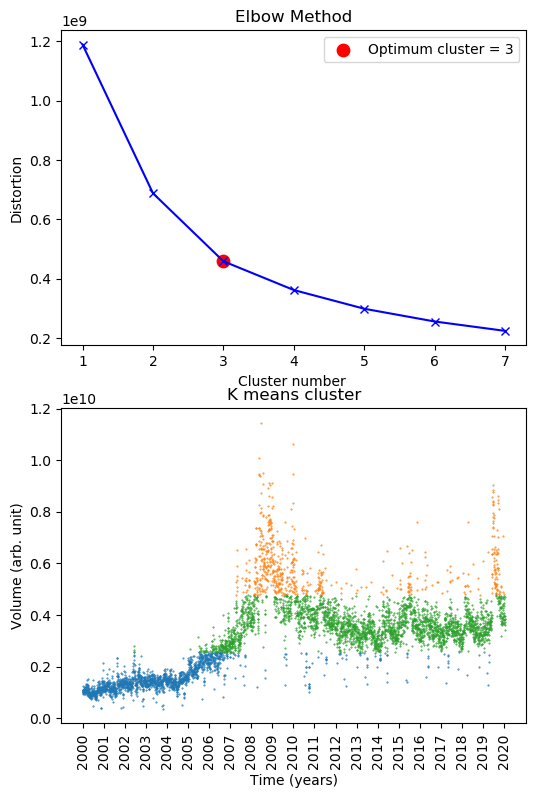

<Figure size 600x900 with 0 Axes>

In [28]:
## plotting the simulation result
fig, axs = plt.subplots(2, 1, figsize=(6,9), dpi=100)
figure(figsize=(6,9), dpi=100 )

axs[0].plot(K, distortions, 'bx-')
axs[0].scatter(opt_cluster, distortions[opt_cluster-1] , s=80, color = 'red', label="Optimum cluster = " + str(opt_cluster) )
axs[0].set_xlabel('Cluster number ')
axs[0].set_ylabel('Distortion')
axs[0].legend()
axs[0].set_title('Elbow Method')

y=y_kmean
clusters = unique(y)
for cluster in clusters:
  index = where(y == cluster)
  axs[1].scatter(newdataset[index, 0],newdataset[index, 1],s=0.2)
axs[1].set_xlabel('Time (years)')    
axs[1].set_ylabel('Volume (arb. unit)') 
axs[1].set_title('K means cluster')

axs[1].set_xticks([i for i in range(0, 5232, 261)]) 
a=axs[1].get_xticks().tolist()
a=np.arange(2000, 2021, 1)
axs[1].set_xticklabels(a, rotation = 90.0)
##axs[1].set_xticks(np.arange(1, 5232, 261), np.arange(2000, 2021, 1), rotation = 45) 
##plt.xticks( rotation='vertical')

fig.savefig("optimumcluster.png", format="png")
plt.show()
plt.close()